# Fraud Detection

### Importing data and Analysis of it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\likhi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [148]:
df=pd.read_csv('Fraud.csv')

In [83]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [84]:
df.shape

(6362620, 11)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [86]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Data cleaning including missing values, outliers and multi-collinearity.  

In [87]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No Missing Values: Here our dataset has no missing values, there's no need for additional handling.

Handling Few Missing Values: If the dataset contains very few missing values, we can delete those rows.

Filling Missing Values: For columns with missing values, we can fill them with the mean, median, mode, or other appropriate statistics.

In [88]:
print(df.duplicated().sum())

0


### Data Pre-processing:
Removed non-relevant transaction types, created a combined balance feature.

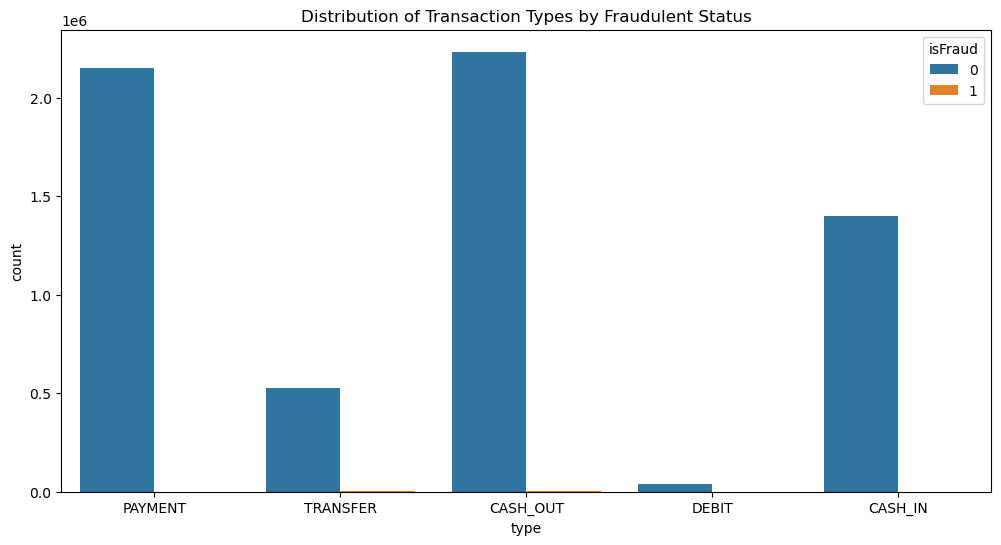

In [89]:
plt.figure(figsize=(12, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Distribution of Transaction Types by Fraudulent Status')
plt.show()

In [90]:
df[df['type']=='PAYMENT'].groupby('isFraud').isFraud.value_counts()

isFraud
0    2151495
Name: count, dtype: int64

In [91]:
df[df['type']=='CASH_IN'].groupby('isFraud').isFraud.value_counts()

isFraud
0    1399284
Name: count, dtype: int64

In [92]:
df[df['type']=='DEBIT'].groupby('isFraud').isFraud.value_counts()

isFraud
0    41432
Name: count, dtype: int64

We can see that there are no frauds in PAYMENT, CASH_IN and DEBIT transaction types. So, we can remove these rows from the dataset.

In [149]:
df = df[(df['type'] != 'PAYMENT') & (df['type'] != 'CASH_IN') & (df['type'] != 'DEBIT')]

In [94]:
df.shape

(2770409, 11)

In [95]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0,0


In [150]:
df= df[~((df['amount'] != abs(df['oldbalanceDest'] - df['newbalanceDest'])) & (df['amount'] != abs(df['oldbalanceOrg'] - df['newbalanceOrig'])))]

In [97]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

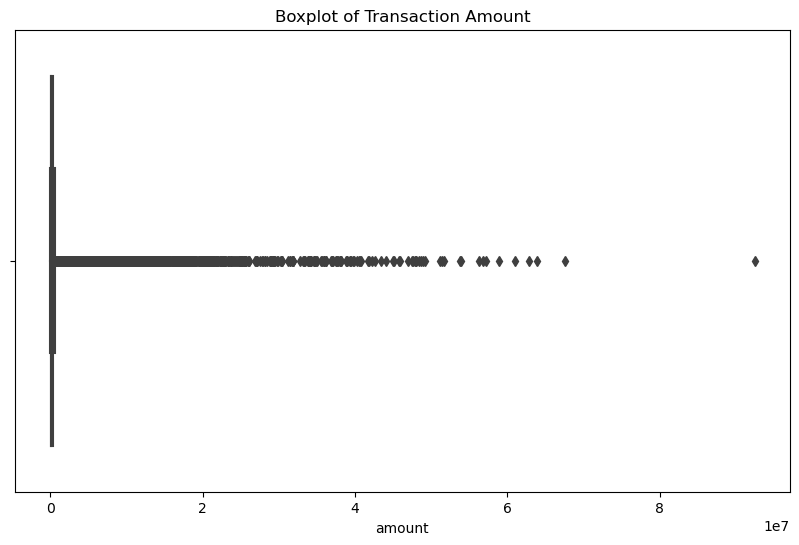

In [235]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['amount'])
plt.title('Boxplot of Transaction Amount')
plt.show()

In [236]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

# Outliers
df_outliers = df[((df['amount'] < (Q1 - 1.5 * IQR)) |(df['amount'] > (Q3 + 1.5 * IQR)))]

In [238]:
df_outliers.isFraud.value_counts()

isFraud
0    70033
1     3330
Name: count, dtype: int64

In [239]:
df.isFraud.value_counts()

isFraud
0    845191
1      8154
Name: count, dtype: int64

Removing outliers is not a good idea since 3000 of them are frauds and we may miss the pattern of those outliers.

#### Frauds trend in outliers of the old and new balances of origin accounts and old and new balances of the destination accounts.

In [242]:
Q1 = df['oldbalanceOrg'].quantile(0.25)
Q3 = df['oldbalanceOrg'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Outliers
df_outliers = df[((df['oldbalanceOrg'] < (Q1 - 1.5 * IQR)) |(df['oldbalanceOrg'] > (Q3 + 1.5 * IQR)))]

df_outliers.isFraud.value_counts()

72056.0


isFraud
0    95887
1     5542
Name: count, dtype: int64

In [244]:
Q1 = df['newbalanceOrig'].quantile(0.25)
Q3 = df['newbalanceOrig'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Outliers
df_outliers = df[((df['newbalanceOrig'] < (Q1 - 1.5 * IQR)) |(df['newbalanceOrig'] > (Q3 + 1.5 * IQR)))]

df_outliers.isFraud.value_counts()

0.0


isFraud
0    176349
1       120
Name: count, dtype: int64

In [245]:
Q1 = df['oldbalanceDest'].quantile(0.25)
Q3 = df['oldbalanceDest'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Outliers
df_outliers = df[((df['oldbalanceDest'] < (Q1 - 1.5 * IQR)) |(df['oldbalanceDest'] > (Q3 + 1.5 * IQR)))]

df_outliers.isFraud.value_counts()

438539.2


isFraud
0    105717
1       829
Name: count, dtype: int64

In [243]:
Q1 = df['newbalanceDest'].quantile(0.25)
Q3 = df['newbalanceDest'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Outliers
df_outliers = df[((df['newbalanceDest'] < (Q1 - 1.5 * IQR)) |(df['newbalanceDest'] > (Q3 + 1.5 * IQR)))]

df_outliers.isFraud.value_counts()

667174.39


isFraud
0    93046
1     1508
Name: count, dtype: int64

5542 frauds are from the oldbalanceOrg outliers,

120 frauds are from newbalanceOrig outliers,

829 frauds are from oldbalanceDest outliers and 

1508 frauds are from newbalanceDest outliers.


##### We can see most of the frauds are in the outlier range of oldBalance of the originated account.

Here our hypothesis is that that most of the frauds depend on the oldBalanceOrig.

Let's see if we can intrepret the same relation of frauds and oldBalanceOrig after our model building.

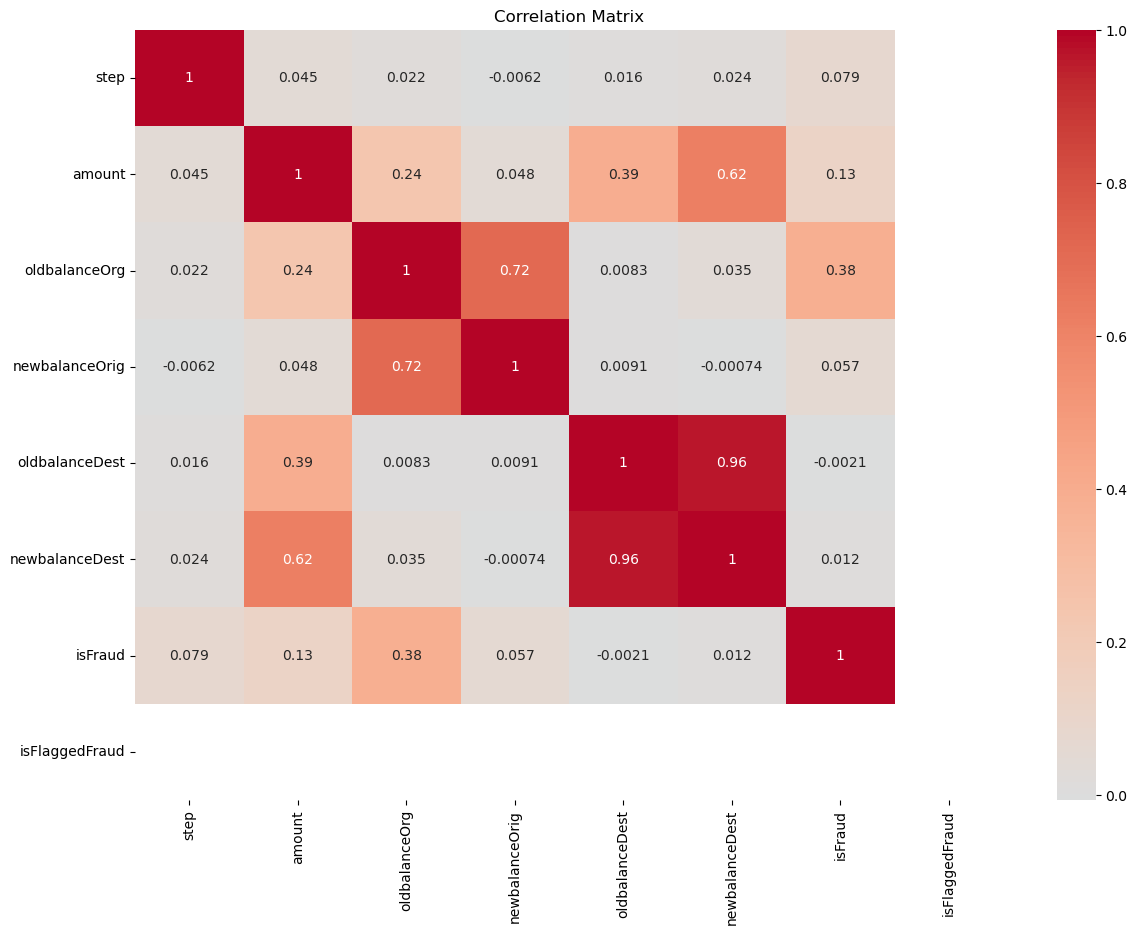

In [151]:
correlation_matrix = df.drop(['type','nameOrig','nameDest'],axis=1).corr()

plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

features = df[['amount', 'oldbalanceDest', 'newbalanceDest', 'oldbalanceOrg', 'newbalanceOrig']]

features_with_constant = sm.add_constant(features)

vif_data = pd.DataFrame()
vif_data['Feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features_with_constant.values, i+1) for i in range(len(features.columns))]

print(vif_data)

          Feature         VIF
0          amount   25.550563
1  oldbalanceDest  187.677162
2  newbalanceDest  263.005235
3   oldbalanceOrg    3.073252
4  newbalanceOrig    2.201707


In [155]:
df1=df
df1['combined_balance'] = df['newbalanceOrig'] + df['newbalanceDest']

df1 = df.drop(columns=['oldbalanceDest', 'newbalanceDest'])

features = df1[['amount', 'oldbalanceOrg', 'combined_balance']]
features_with_constant = sm.add_constant(features)

vif_data = pd.DataFrame()
vif_data['Feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features_with_constant.values, i+1) for i in range(len(features.columns))]

print(vif_data)

            Feature       VIF
0            amount  1.734962
1     oldbalanceOrg  1.066661
2  combined_balance  1.649656


Multi-collinearity was addressed by calculating the Variance Inflation Factor (VIF) for the features. Features with high VIF values were combined or removed to reduce multi-collinearity.

The final features used were 'amount', 'oldbalanceOrg', and 'combined_balance'.

In [156]:
df1.shape

(853345, 10)

In [157]:
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'isFraud', 'isFlaggedFraud', 'combined_balance'],
      dtype='object')

### Analysis of the data

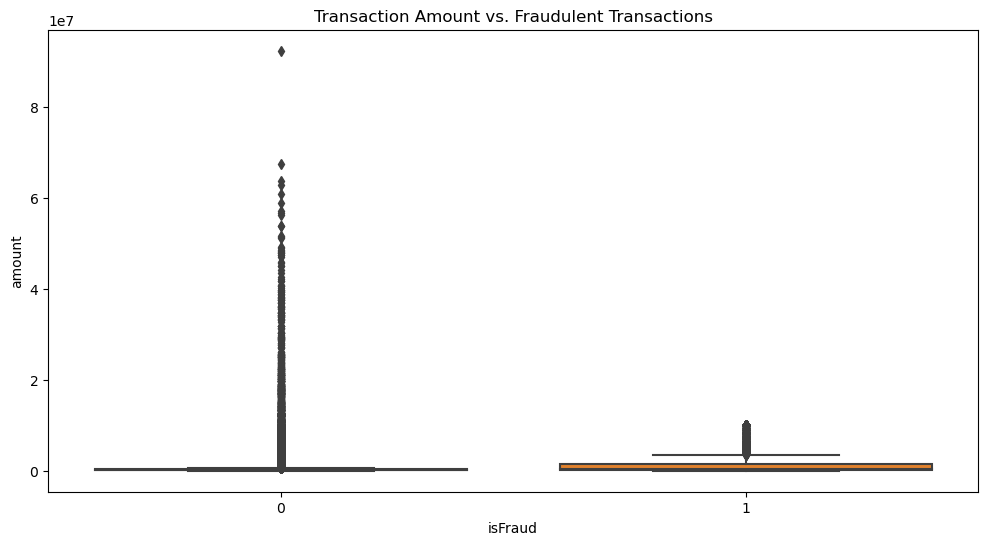

In [158]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='isFraud', y='amount', data=df1)
plt.title('Transaction Amount vs. Fraudulent Transactions')
plt.show()

In [159]:
fraudulent_amounts = df1[df1['isFraud'] == 1]['amount']
print(fraudulent_amounts)

2              181.00
3              181.00
251           2806.00
252           2806.00
680          20128.00
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, Length: 8154, dtype: float64


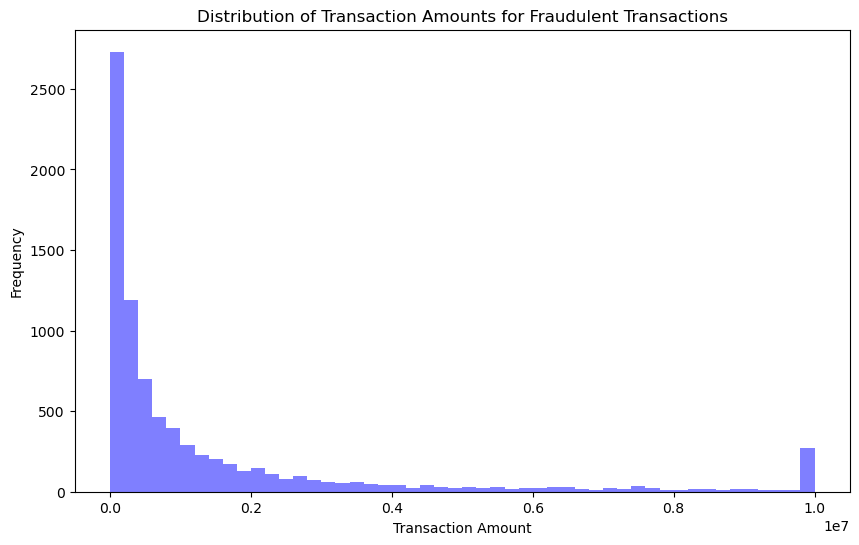

In [160]:
plt.figure(figsize=(10, 6))
plt.hist(fraudulent_amounts, bins=50, color='blue', alpha=0.5)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts for Fraudulent Transactions')
plt.show()

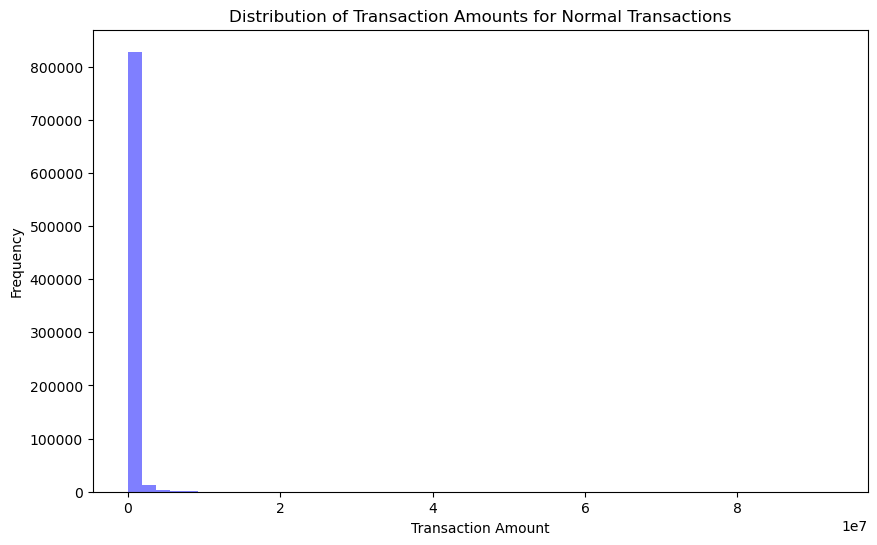

In [161]:
normal_amounts = df1[df1['isFraud'] == 0]['amount']
plt.figure(figsize=(10, 6))
plt.hist(normal_amounts, bins=50, color='blue', alpha=0.5)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts for Normal Transactions')
plt.show()

###### We can see most of the high amount transactions are frauds.

In [162]:
df1.type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [163]:
fraud_count_by_type = df1[df1['isFraud'] == 1].groupby('type').size().reset_index(name='fraud_count')
print(fraud_count_by_type)

       type  fraud_count
0  CASH_OUT         4101
1  TRANSFER         4053


In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(df1['isFlaggedFraud'], df1['isFraud'])
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[845191   8154]
 [     0      0]]


In [165]:
accuracy = accuracy_score(df1['isFlaggedFraud'], df1['isFraud'])
print("\nAccuracy:", accuracy)


Accuracy: 0.9904446618893882


As interpreted from the plots above and also from the confusion matrix we can see that the model which flags the amount greater than 200 in a single transaction works accurately (99%). 


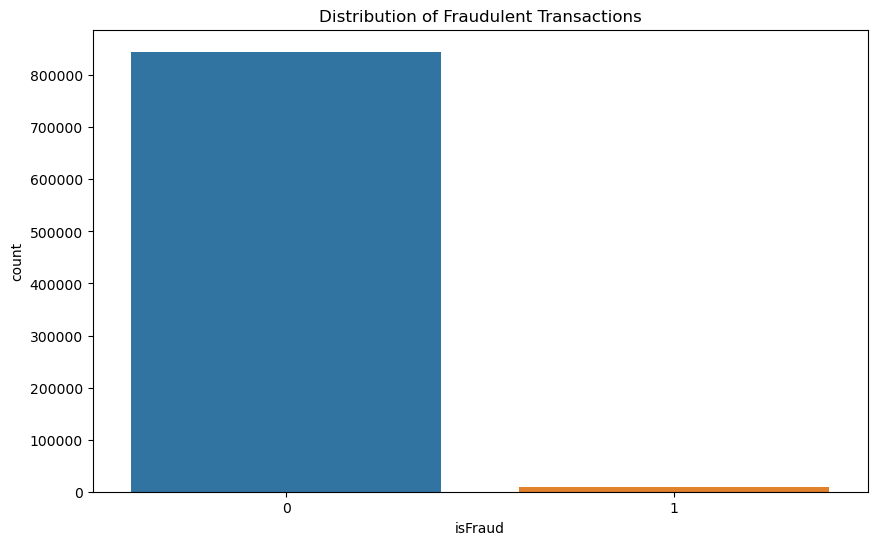

In [166]:
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', data=df1)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

In [167]:
df1.isFraud.value_counts()

isFraud
0    845191
1      8154
Name: count, dtype: int64

We observe that the dataset is imbalanced, with a significantly larger number of normal transactions compared to fraudulent ones. Training a model on such an imbalanced dataset can result in a bias towards the normal transactions. To address this issue, we can use the following techniques:

###### Under-sampling:  
This technique involves reducing the number of normal transactions to match the count of fraud transactions. While this helps balance the dataset, it can result in a loss of valuable information from the normal transactions.

##### Over-sampling: 
One effective method for over-sampling is the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE generates synthetic samples of the minority class (fraud transactions) to increase its count, thereby balancing the dataset without simply duplicating existing samples.

In [168]:
normal= df1[df1['isFraud']==0]
fraud= df1[df1['isFraud']==1]

In [169]:
print(normal.shape,fraud.shape)

(845191, 10) (8154, 10)


In [170]:
normal.amount.describe()/1000

count      845.191000
mean       326.168046
std        824.879468
min          0.001000
25%         88.734005
50%        179.629480
75%        319.958195
max      92445.516640
Name: amount, dtype: float64

In [171]:
fraud.amount.describe()/1000

count        8.154000
mean      1441.026249
std       2361.242571
min          0.000000
25%        126.715840
50%        438.224600
75%       1499.869540
max      10000.000000
Name: amount, dtype: float64

The average transaction amount for fraud transactions (1441.97k) is significantly higher than that of normal transactions (326.20k). This suggests that fraudulent transactions tend to involve larger amounts of money compared to normal transactions.

In [173]:
#df1.groupby('isFraud').mean()

Here I am using undersampling technique to build the model.



In [174]:
normal_sample = normal.sample(n=len(fraud), random_state=42)

In [175]:
print(normal_sample.shape,fraud.shape)

(8154, 10) (8154, 10)


In [176]:
new_df= pd.concat([normal_sample,fraud],axis=0)

In [177]:
new_df.isFraud.value_counts()

isFraud
0    8154
1    8154
Name: count, dtype: int64

In [178]:
#new_df.groupby('amount').mean()

We can see that the nature of the dataset hasn't changed much

In [179]:
new_df['hours_transformed'] = ((new_df['step'] - 1) % 24) + 1

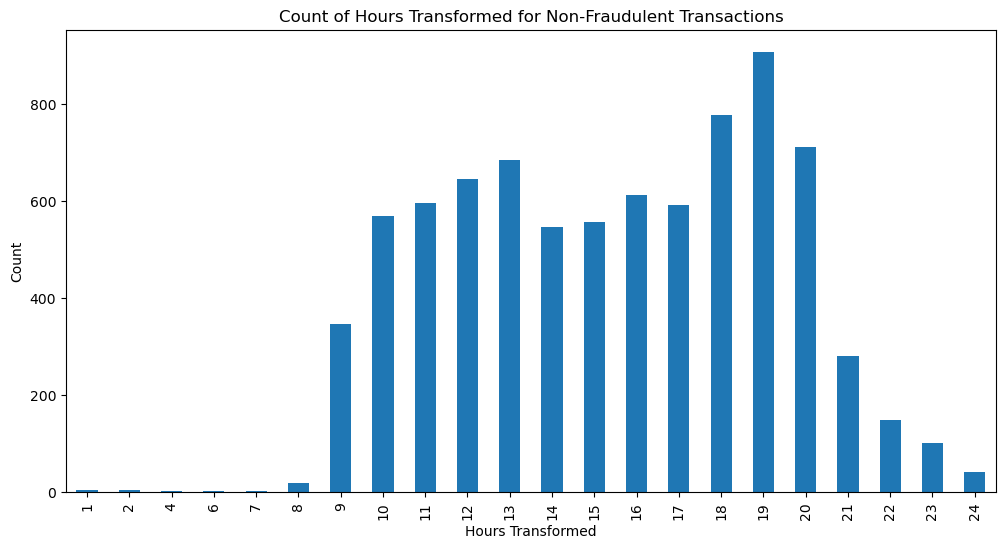

In [180]:
fraud_zero_counts = new_df[new_df['isFraud'] == 0]['hours_transformed'].value_counts()
fraud_zero_counts=fraud_zero_counts.sort_index()

plt.figure(figsize=(12, 6))
fraud_zero_counts.plot(kind='bar')
plt.xlabel('Hours Transformed')
plt.ylabel('Count')
plt.title('Count of Hours Transformed for Non-Fraudulent Transactions')
plt.show()

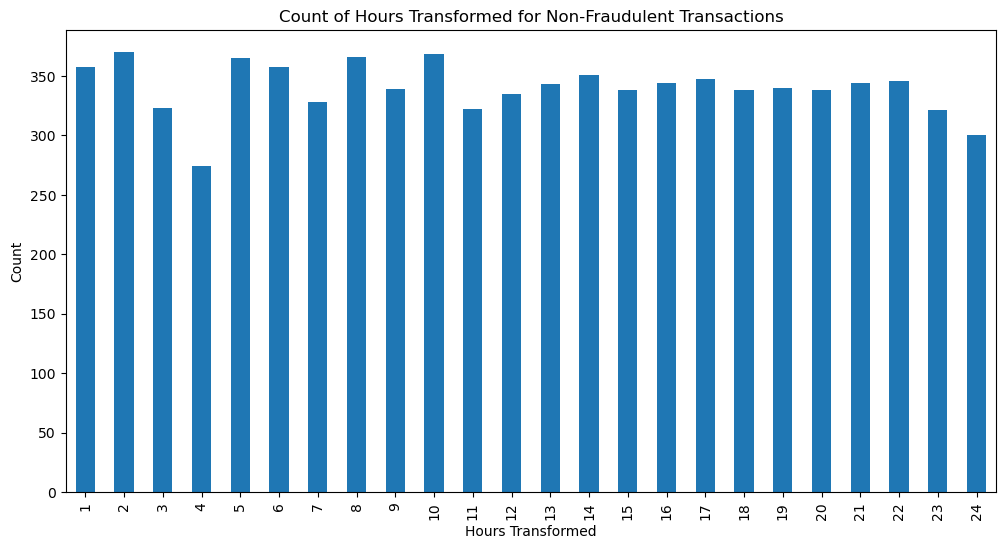

In [181]:
fraud_one_counts = new_df[new_df['isFraud'] == 1]['hours_transformed'].value_counts()
fraud_one_counts=fraud_one_counts.sort_index()
plt.figure(figsize=(12, 6))
fraud_one_counts.plot(kind='bar')
plt.xlabel('Hours Transformed')
plt.ylabel('Count')
plt.title('Count of Hours Transformed for Non-Fraudulent Transactions')
plt.show()

We can see more number of frauds in 1-8 hours range than the normal transactions. 

(i.e,The transactions happening after midnight are mostly frauds)

In [182]:
new_df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'isFraud', 'isFlaggedFraud', 'combined_balance',
       'hours_transformed'],
      dtype='object')

In [183]:
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'combined_balance','hours_transformed']
new_df[numerical_cols] = (new_df[numerical_cols] - new_df[numerical_cols].mean()) / new_df[numerical_cols].std()

categorical_cols = ['type']
new_df = pd.get_dummies(new_df, columns=categorical_cols, drop_first=True)

In [184]:
print(new_df.head())

         step    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
1810297   163 -0.466613  C1777545414      -0.257092        0.076529   
5046788   354 -0.313081  C1189064585      -0.336070       -0.067117   
2690748   211 -0.364778  C1120753754      -0.236647       -0.036736   
5358164   375 -0.447405  C1078840395      -0.257455        0.046656   
1812566   163 -0.409772  C1716426574      -0.241647        0.021444   

            nameDest  isFraud  isFlaggedFraud  combined_balance  \
1810297  C1647128891        0               0         -0.273014   
5046788  C1466293753        0               0          0.096317   
2690748   C515305940        0               0         -0.184013   
5358164  C1323450422        0               0         -0.247536   
1812566  C2047849364        0               0         -0.071931   

         hours_transformed  type_TRANSFER  
1810297           0.879759          False  
5046788           0.706000           True  
2690748           0.879759          Fa

### Splitting the dataset into features and target

In [185]:
X = new_df.drop(['step','isFraud','nameOrig','nameDest','isFlaggedFraud'], axis=1)
y = new_df['isFraud']

In [186]:
print(X)
print(y)

           amount  oldbalanceOrg  newbalanceOrig  combined_balance  \
1810297 -0.466613      -0.257092        0.076529         -0.273014   
5046788 -0.313081      -0.336070       -0.067117          0.096317   
2690748 -0.364778      -0.236647       -0.036736         -0.184013   
5358164 -0.447405      -0.257455        0.046656         -0.247536   
1812566 -0.409772      -0.241647        0.021444         -0.071931   
...           ...            ...             ...               ...   
6362615 -0.292955      -0.197682       -0.067117         -0.233261   
6362616  2.941221       2.235227       -0.067117         -0.325859   
6362617  2.941221       2.235227       -0.067117          1.413313   
6362618 -0.016575       0.010225       -0.067117         -0.325859   
6362619 -0.016575       0.010225       -0.067117          1.680519   

         hours_transformed  type_TRANSFER  
1810297           0.879759          False  
5046788           0.706000           True  
2690748           0.879759 

In [187]:
print(X.shape,y.shape)

(16308, 6) (16308,)


In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression: 

### Describe your fraud detection model in elaboration.  

#### Data Preprocessing: 
Removed non-relevant transaction types, created a combined balance feature, and normalized numerical features.
#### Balancing the Dataset: 
Used under-sampling to balance the dataset by reducing the number of normal transactions to match the count of fraud transactions.
#### Feature Selection: 
Selected relevant features based on VIF analysis.
#### Model Training: 
Trained a logistic regression model using the processed dataset.
#### Hyperparameter Tuning: 
Performed hyperparameter tuning using GridSearchCV to find the best parameters for the logistic regression model.

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [191]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [192]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8974044553443695


The logistic regression model achieved an accuracy of approximately 88%.

### Logistic regression with hyper parameter tuning 

In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear']
}

In [195]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

C:\Users\likhi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\likhi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\likhi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\likhi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\likhi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\likhi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

### Demonstrate the performance of the model by using best set of tools.  

In [196]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


In [197]:
best_logreg = grid_search.best_estimator_

coefficients = best_logreg.coef_[0]
intercept = best_logreg.intercept_

In [198]:
feature_names = X_train.columns
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coeff_df)

             Feature  Coefficient
0             amount  -100.555463
1      oldbalanceOrg   152.535665
2     newbalanceOrig   -77.637029
3   combined_balance    -0.013431
4  hours_transformed    -0.566911
5      type_TRANSFER     2.329940


###### We can notice that frauds are mostly depending on the Old  Balance of the originated account. 
We have already seen this during the outlier count that most of the frauds are depending on the old balance of the origin account.

###  What are the key factors that predict fraudulent customer?  
We can see that the parameters oldbalanceOrg, newbalanceOrig and amount affect the fraudelent behaviour the most.

### Do these factors make sense? If yes, How? If not, How not?  
Yes, these factors make sense:

Amount: Fraudulent transactions tend to involve higher amounts as fraudsters aim to maximize their gain.

Old Balance Origin & New Balance Origin: Significant changes in the origin account balance can indicate suspicious activities.

In [199]:
best_logreg = grid_search.best_estimator_
y_pred_tuned = best_logreg.predict(X_test)

In [200]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Accuracy:", accuracy_tuned)

Tuned Model Accuracy: 0.9190680564071122


Peformance of the model has been increased after using hyperparameter tuning

### Using PCA:
We can use PCA instead of combining columns which are highly correlated.

In [ ]:
df['hours_transformed'] = ((df['step'] - 1) % 24) + 1

In [207]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [209]:
features = df[['hours_transformed','amount', 'oldbalanceDest', 'newbalanceDest', 'oldbalanceOrg', 'newbalanceOrig']]

type_dummies = pd.get_dummies(df['type'], prefix='type')

In [210]:
features_encoded = pd.concat([features, type_dummies], axis=1)

In [211]:
scaler = StandardScaler()
scaled_features_encoded = scaler.fit_transform(features_encoded)

In [212]:
pca = PCA()
pca.fit(scaled_features_encoded)

PCA()

In [213]:
explained_variance_ratio = pca.explained_variance_ratio_

In [214]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [215]:
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

In [216]:
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(scaled_features)

In [217]:
pca_data = pd.DataFrame(data=pca_features, columns=[f'PC{i+1}' for i in range(n_components)])

In [218]:
print(pca_data.head())

print(f'Explained Variance Ratio: {explained_variance_ratio}')

print(f'Cumulative Explained Variance: {cumulative_explained_variance}')

        PC1       PC2       PC3       PC4       PC5
0 -0.463857 -0.024831 -3.725097  0.779063  0.035402
1 -0.458646 -0.026386 -3.724256  0.783212  0.034161
2 -0.385754  0.177283 -3.725005  0.726346 -0.036595
3 -0.461304 -0.019978 -3.725410  0.775969  0.031333
4 -0.454859 -0.021902 -3.724369  0.781101  0.029798
Explained Variance Ratio: [3.41727726e-01 2.18726211e-01 2.10351897e-01 1.25800527e-01
 7.22459171e-02 3.08853981e-02 2.62322752e-04 2.72646780e-34]
Cumulative Explained Variance: [0.34172773 0.56045394 0.77080583 0.89660636 0.96885228 0.99973768
 1.         1.        ]


In [219]:
target = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(pca_data, target, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9947735089559322


We can see that the accuracy has been increased after using PCA.

### What kind of prevention should be adopted while company update its infrastructure?

#### Real-time Monitoring:
Implement real-time monitoring systems to detect and flag suspicious transactions instantly.
#### Multi-factor Authentication: 
Use multi-factor authentication for transaction approval to ensure the legitimacy of the transactions.
#### Machine Learning Models: 
Continuously update and train machine learning models on new data to detect emerging fraud patterns.
#### Data Encryption: 
Ensure all transaction data is encrypted to protect sensitive information from being accessed by unauthorized users.

### Assuming these actions have been implemented, how would you determine if they work? 

#### Reduction in Fraudulent Transactions: 
Monitor the number of fraudulent transactions over time to see if there is a reduction.
#### False Positives and Negatives: 
Track the rates of false positives and false negatives. A decrease would indicate improved model performance.
#### Customer Feedback: 
Collect feedback from customers regarding any suspicious activities and their experiences.